## 0. Código

In [ ]:
!pip install numpy seaborn

In [53]:
# Importar librearías

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Configuración general de la estética de los plots/gráficas

COLOR_BASE = '#00AF43'
TAMAÑO_TITULO_FIGURA = 13
TAMAÑO_TITULO_PLOT = 11.5
TAMAÑO_ETIQUETAS_EJES = 9.5
TAMAÑO_TICKS_VALORES = 9

## 1. Compración entre Formas de Generar la Población Inicial

In [ ]:
def GenerarPoblaciónInicial(
        TamañoPoblación: int,
        DimensiónProblema: int,
        Distribución: str = 'Uniforme',
        ParamétrosDistribución: tuple[float,float] = (-100,100),
    ) -> np.ndarray:
    """
    Descripción
    -----------
    Función para generar la **población inicial** de soluciones de forma *aleatoria*. 
    Puede ser generada usando una distribución `Uniforme` (lo recomendado) o 
    con una distribución `Normal`. Devuelve la población en un array de NumPy 
    generado con los parámetros pasados
    
    Parameters
    ----------
    TamañoPoblación: int
        Representa el *número de soluciones* o el tamño de tu población

    DimensiónProblema: int
        Representa el *tamaño o dimensión de la entrada* de tu función a optimizar

    Distribución: str
        Nombre de la *función de distribución* a emplear para generar la población (`Uniforme` o `Normal`)

    ParamétrosDistribución: tuple[float,float]
        *Lista de parámetros* (e.g. media, std) que definen a la distribución que vas a usar

    Return
    ------
    Población
        *Array de población* que se creó de forma aleatoria
    """

    FormaMatrizPoblación = (TamañoPoblación,DimensiónProblema)
    
    if Distribución == 'Uniforme':
        GenerarPoblaciónAleatoria = np.random.uniform
    if Distribución == 'Normal':
        GenerarPoblaciónAleatoria = np.random.normal
    
    return GenerarPoblaciónAleatoria(*ParamétrosDistribución,FormaMatrizPoblación)

In [ ]:
def VisualizarPoblación(
        PoblaciónSoluciones: np.ndarray,
        EjePlot: plt.Axes,
    ) -> None:
    """
    Descripción
    -----------
    Función que permite **visualizar/graficar** una población. Solo plotea 
    los *atributos/dimensiones 1 y 2* haciendo uso de un *scatter plot*.

    Parameters
    ----------
    PoblaciónSoluciones: np.ndarray
        *Población de soluciones* que se van a graficar

    EjePlot: plt.Axes
        *Eje o axe de `matplotlib`* sobre el cual se va a plotear la población (o cear el plot)
    """

    sns.scatterplot(
        x = PoblaciónSoluciones[:,0],
        y = PoblaciónSoluciones[:,1],
        
        color = COLOR_BASE,
        ax = EjePlot,
    )

    EjePlot.set_xlabel('Atributo 1',size=TAMAÑO_ETIQUETAS_EJES)
    EjePlot.set_ylabel('Atributo 2',size=TAMAÑO_ETIQUETAS_EJES)
    EjePlot.tick_params(labelsize=TAMAÑO_TICKS_VALORES)

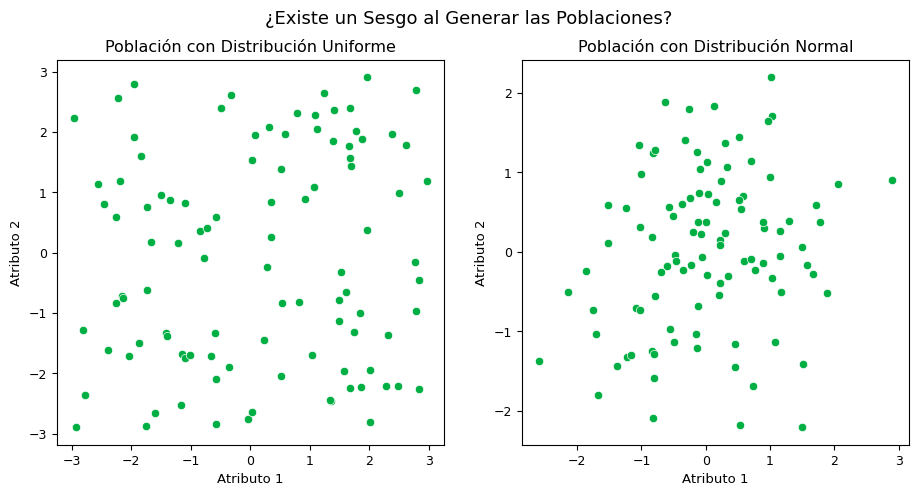

In [117]:
TiposDistribución = ['Uniforme','Normal']
ParámetrosDistribución = [(-3,3),(0,1)]

Figura , EjesPlots = plt.subplots(1,2,figsize=(11,5))
for _tipo_distribución , _parámetros_distribución , _indice_eje in zip(TiposDistribución,ParámetrosDistribución,range(2)):
    _población_generada = GenerarPoblaciónInicial(100,2,_tipo_distribución,_parámetros_distribución)
    
    _eje_plot = EjesPlots[_indice_eje]
    VisualizarPoblación(_población_generada,_eje_plot)
    _eje_plot.set_title(f'Población con Distribución {_tipo_distribución}',size=TAMAÑO_TITULO_PLOT)

Figura.suptitle('¿Existe un Sesgo al Generar las Poblaciones?',fontsize=TAMAÑO_TITULO_FIGURA);